# CAPSTONE 2 - CAR SHARING DELIVERY OPTIONS EXPERIMENT
The data was scrapped from the website "Turo.com"  - the biggest car sharing platform (by google.com).
We would like to find out if the * delivery to the main airport has significant difference in utilisation rate * for cars on the platform. 

For the experiment we will define two groups (A/B) of cars within one area whoes ownets do and don't do delivery. (We will hire part of the owners to do delivery)
We will observe for three months within one season the results to see if there are significant difference. 
We will look at the normalized data within category of cars.
The baseline month will be Marh 2018.

** STEPS ** :
1. Prepare the baseline 
    - Clean the data
    - Build the graphs
    - Confirm the baseline
2. Define the sample size (make sure the sample conclude all random listings)
3. Conduct the exeriment
4. Calculate the difference between the two A/B groups
5. Calculate T-test for the experiment

** Preparation and Narrative Analytics ** :

For the experiment let's focus on one state. We decided to narrow our experiment to California to make the data less random. (In[57])
We've got 14000 active listings in the state ((In[45])). Put on the map with the categories (In[44]), (In[53])
We have a column in our data - "Airport Delivery fee" it's the delivery to the closest airport. After cleaning manipulation we see that there are three main options for owners (In[107]):

- provide delivery for $
- free delivey
- no delivery
Let's see if the current delivery conditions affect on utilisation rate(UR). UR was calculated based on the occupancy numbers (In[110])
Based on the plot (In121) we've can say visually that the delivery increases the utilisation rate . However, it is not equal for every category. 
For the esperiment we need to make sure to have our sample size contains the cars from every category in a correct proportions (In[107])
In order to ananalyze the data we found the coefficient of correlation to see if there any correlation between the cost of the delivery and potential earnings for the host (In[107])

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
%matplotlib inline
import seaborn as sns
from pandas import ExcelWriter
from pandas import ExcelFile
import math as mt


In [56]:
df = pd.read_excel ('Workbook_Turo_March.xlsx',
    sheet_name='DATA',
    skiprows=[1] # header data
)

In [57]:
#filtering only Active listings
df = df[df['Status'] =="Active"]
df = df[df['State'] == 'CA']
#replace column name
df.rename(columns={'Airport Delivery fee':'fee'}, inplace=True)

In [58]:
df = df[pd.to_numeric(df['Latitude'], errors='coerce').notnull()]
df['Latitude'] = df.Latitude.astype(float)

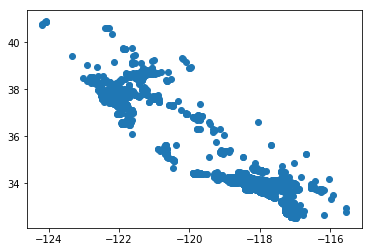

In [53]:
#mapping our location distribution all over the CA
import matplotlib.pyplot as plt
plt.scatter(x=df ['Longitude'], y=df['Latitude'])
plt.show()

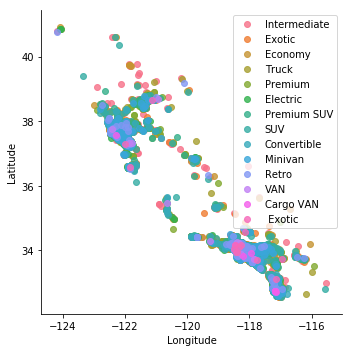

In [44]:
sns.lmplot( x="Longitude", y="Latitude", data=df, fit_reg=False, hue='Category', legend=False)
 
# Move the legend to an empty part of the plot
plt.legend(loc='upper right')

In [45]:
df.describe ()

,Car ID,Year,Number of seats,Number of doors,GPS,Booking Instantly,Latitude,Longitude,Owner ID,Price per day,...,Reviews number,Owner rate,Airport ride needed,Business class,numberOfFaqs,minimumAgeInYearsToRent,numberOfFavorites,highValueVehicle,frequentlyBooked,dateRangeRate
count,14383.000000,14383.000000,11508.000000,12035.000000,7017.0,14383.000000,14383.000000,14383.000000,1.438300e+04,14383.000000,...,14383.000000,8103.000000,10528.000000,14383.000000,14383.000000,9684.000000,14383.000000,14383.000000,12508.0,0.0
mean,288526.852395,2013.357297,4.860879,3.583797,1.0,0.126816,34.830492,-119.100508,2.347967e+06,100.639644,...,8.952305,4.886462,0.051862,0.103873,0.284850,4.423792,30.010151,0.095599,0.0,NaN
std,87974.688674,5.471617,1.134030,0.859512,0.0,0.332779,1.720371,1.786836,1.647161e+06,107.245309,...,17.056132,0.375855,0.221758,0.305106,1.168943,10.637458,63.279437,0.294051,0.0,NaN
min,92.000000,1947.000000,2.000000,2.000000,1.0,0.000000,32.547562,-124.178287,2.690000e+02,10.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN
25%,228530.500000,2012.000000,5.000000,4.000000,1.0,0.000000,33.919050,-120.096301,9.907460e+05,40.000000,...,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.0,NaN
50%,306381.000000,2015.000000,5.000000,4.000000,1.0,0.000000,34.087693,-118.375041,2.003221e+06,65.000000,...,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,0.0,NaN
75%,364016.000000,2016.000000,5.000000,4.000000,1.0,0.000000,36.594052,-118.066554,3.640784e+06,119.000000,...,9.000000,5.000000,0.000000,0.000000,0.000000,0.000000,29.000000,0.000000,0.0,NaN
max,400742.000000,2018.000000,12.000000,5.000000,1.0,1.000000,40.932871,-115.552010,5.796124e+06,999.000000,...,210.000000,5.000000,1.000000,1.000000,16.000000,30.000000,1036.000000,1.000000,0.0,NaN


In [59]:
df ['fee']

37                30
105               30
217              NaN
349              NaN
400        Up to $80
444               30
498              NaN
703              NaN
801              NaN
890              NaN
1078             NaN
1165             NaN
1441             NaN
1857             NaN
1953             NaN
2084             NaN
2141             NaN
4232             NaN
4594             NaN
4666             NaN
4749             NaN
4828             NaN
4885             NaN
5023              60
5159             NaN
5351              50
5567              20
5628             NaN
5661             NaN
5666             NaN
             ...    
174787           NaN
174792    Up to $110
174799           NaN
174800           NaN
174803           120
174820            20
174822           NaN
174837           NaN
174851     Up to $60
174855            35
174867           NaN
174871           NaN
174890           100
174891          Free
174895           NaN
174938          Free
174939       

In [67]:
# Cleaning the data for the FEE , 
df['fee'].replace(regex=True,inplace=True,to_replace=r'\$', value=r'')
df['fee'].replace(regex=True,inplace=True,to_replace=r'Up to', value=r'')
df['fee'].replace(regex=True,inplace=True,to_replace=r'£', value=r'')
df['fee'].replace(regex=True,inplace=True,to_replace=r'NaN', value=r'-1')

In [109]:
#Cleaning Nan to 0 - no delivery
df['fee'].fillna(0, inplace=True)

In [95]:
#replace 'free' into int
df['fee'] = df['fee'].replace(to_replace =['Free'],
                  value = '-999')

In [99]:
#convert to Int
df['fee'] = df['fee'].astype(int)

In [103]:
# Create a list to store the data
fee_cat = []

# For each row in the column,
for row in df['fee']:
    # if more than a value,
    if row > 0:
        # Append a letter grade
        fee_cat.append('Paid Delivery')
    # else, if free,
    elif row < 0:
        # Append a letter grade
        fee_cat.append('Free')
    # otherwise,
    else:
        # Append a failing grade
       fee_cat.append('No delivery')
        
# Create a column from the list
df['fee_cat'] = fee_cat


In [107]:
df['fee_cat']

37        Paid Delivery
105       Paid Delivery
217         No delivery
349         No delivery
400       Paid Delivery
444       Paid Delivery
498         No delivery
703         No delivery
801         No delivery
890         No delivery
1078        No delivery
1165        No delivery
1441        No delivery
1857        No delivery
1953        No delivery
2084        No delivery
2141        No delivery
4232        No delivery
4594        No delivery
4666        No delivery
4749        No delivery
4828        No delivery
4885        No delivery
5023      Paid Delivery
5159        No delivery
5351      Paid Delivery
5567      Paid Delivery
5628        No delivery
5661        No delivery
5666        No delivery
              ...      
174787      No delivery
174792    Paid Delivery
174799      No delivery
174800      No delivery
174803    Paid Delivery
174820    Paid Delivery
174822      No delivery
174837      No delivery
174851    Paid Delivery
174855    Paid Delivery
174867      No d

In [110]:
#Utilisation rate - % of month that car has been rented, drop all null
df['UR'] = ((df['Occupancy Mar 18']+2 - df['Unavailable by owner Mar18']))/((31-df['Unavailable by owner Mar18']))
#remove null
df = df[pd.to_numeric(df['UR'], errors='coerce').notnull()]
df['UR']

10338     0.363636
22549    -2.111111
25859     0.344828
25915     0.000000
29957         -inf
30104    -3.800000
36152         -inf
36987    -0.411765
38612     0.320000
40388         -inf
42119     0.120000
42614         -inf
43457         -inf
44150    -0.037037
44758    -0.133333
45111    -2.500000
46160     0.379310
48166     0.333333
48790    -0.625000
50932         -inf
51345         -inf
51535     0.482759
52451     0.692308
52528         -inf
54156     0.263158
56191         -inf
56462         -inf
56499     0.083333
56842     0.409091
57233     1.000000
            ...   
113189    0.037037
113190    0.037037
113203    0.000000
113205    0.034483
113216    0.034483
113230    0.035714
113237    0.035714
113239    0.037037
113251    0.038462
113273    0.038462
113292    0.000000
113336    0.037037
113374    0.000000
113386    0.034483
113396    0.037037
113398    0.037037
113424    0.035714
113430    0.035714
113476    0.000000
113525    0.034483
113630    0.035714
113671    0.

In [111]:
#remove all negative
df = df[(df[['UR']] > 0).all(1)]
#remove all more than 1
df = df[(df[['UR']] < 1).all(1)]
#drop all inf
df.replace([np.inf, -np.inf], np.nan).dropna(subset=["UR"], how="all")


,Car ID,URL,Make,Model,For Category,Category,Trim,Year,Color,Transmission,...,Vehicle protection,numberOfFaqs,regularAirportDeliveryFee,minimumAgeInYearsToRent,numberOfFavorites,highValueVehicle,frequentlyBooked,dateRangeRate,fee_cat,UR
10338,29441,https://turo.com/rentals/suvs/ca/san-bruno/hon...,Honda,Element,HondaElement,SUV,NaN,2003,SILVER,A,...,Turo Standard,1,20,0.0,103,0,0.0,NaN,Paid Delivery,0.363636
25859,62584,https://turo.com/rentals/cars/ca/culver-city/t...,Toyota,Corolla,ToyotaCorolla,Intermediate,NaN,2007,BLUE,A,...,Turo Standard,0,0,0.0,86,0,0.0,NaN,No delivery,0.344828
38612,87587,https://turo.com/rentals/cars/ca/los-angeles/t...,Toyota,Corolla,ToyotaCorolla,Intermediate,NaN,2007,SILVER,A,...,Turo Standard,0,0,0.0,121,0,0.0,NaN,No delivery,0.320000
42119,94705,https://turo.com/rentals/cars/ca/daly-city/for...,Ford,Mustang,FordMustang,Intermediate,NaN,2015,WHITE,A,...,Turo Standard,0,0,0.0,262,0,0.0,NaN,No delivery,0.120000
46160,104327,https://turo.com/rentals/cars/ca/millbrae/pors...,Porsche,Boxster,PorscheBoxster,Exotic,S,2013,GRAY,A,...,Turo Standard,6,Up to $120,0.0,354,0,0.0,NaN,Paid Delivery,0.379310
48166,108717,https://turo.com/rentals/cars/ca/redondo-beach...,Audi,A4,AudiA4,Convertible,NaN,2007,WHITE,A,...,Turo Basic,0,0,0.0,130,0,0.0,NaN,No delivery,0.333333
51535,114823,https://turo.com/rentals/cars/ca/inglewood/aud...,Audi,A3,AudiA3,Convertible,1.8 TFSI Premium,2016,WHITE,A,...,Turo Standard,0,Free,0.0,437,0,0.0,NaN,Free,0.482759
52451,116646,https://turo.com/rentals/cars/ca/westminster/s...,smart,fortwo,smartfortwo,Convertible,passion cabrio,2008,WHITE,A,...,Turo Basic,0,0,0.0,83,0,0.0,NaN,No delivery,0.692308
54156,122580,https://turo.com/rentals/cars/ca/los-angeles/t...,Tesla,Model S,TeslaModel S,Electric,P85D,2015,WHITE,A,...,Turo Premium,0,0,30.0,4,1,0.0,NaN,No delivery,0.263158
56499,126219,https://turo.com/rentals/suvs/ca/san-jose/jeep...,Jeep,Wrangler,JeepWrangler,Convertible,NaN,2015,RED,A,...,Turo Standard,0,0,0.0,111,0,0.0,NaN,Paid Delivery,0.083333


In [119]:
#TOP 10 cars by earnings/month in Mar 2018
df['Earning'] = df['UR'] * 31*df['Price per day']
dfs = df [['Make', 'Model','Price per day', 'UR','Category', 'Earning', 'fee_cat']]
dfl = dfs.nlargest(20, ['Earning'])
dfl


,Make,Model,Price per day,UR,Category,Earning,fee_cat
77030,Infiniti,Q50,749.0,0.350000,Premium,8126.650000,Paid Delivery
74428,Lamborghini,Huracan,999.0,0.240000,Exotic,7432.560000,Paid Delivery
70090,Ferrari,488 GTB,700.0,0.206897,Exotic,4489.655172,Paid Delivery
94116,Tesla,Model X,179.0,0.793103,Electric,4400.931034,Paid Delivery
80780,Tesla,Model X,222.0,0.607143,Electric,4178.357143,Paid Delivery
102679,Chevrolet,Corvette,250.0,0.480000,Exotic,3720.000000,Paid Delivery
100710,Tesla,Model S,169.0,0.629630,Electric,3298.629630,Paid Delivery
84850,Mercedes-Benz,E-Class,121.0,0.875000,Premium,3282.125000,No delivery
92398,Mercedes-Benz,E-Class,120.0,0.866667,Premium,3224.000000,Paid Delivery
62635,Mercedes-Benz,C-Class,125.0,0.818182,Exotic,3170.454545,Paid Delivery


In [113]:
(df.groupby('Category')['UR']
 .agg(['mean'])
 .style.format('{:.2%}'))

,mean
Category,
Convertible,36.60%
Economy,39.24%
Electric,23.39%
Exotic,20.37%
Intermediate,36.37%
Minivan,30.80%
Premium,29.96%
Premium SUV,25.74%
Retro,21.09%


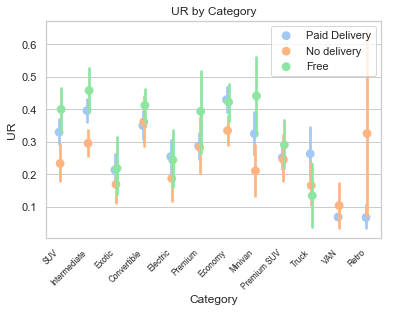

In [126]:
sns.set(style="whitegrid")

g = sns.pointplot(x="Category", y="UR", hue= 'fee_cat', data=df,
                   height=6, kind="strip", palette="pastel",ci=95,dodge=True,join=False)
plt.title('UR by Category')
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize='x-small')
plt.legend(loc='upper right')
plt.show()

In [140]:
df.groupby('Category').size().sort_values(ascending=False)

Category
Intermediate    410
Economy         390
SUV             219
Convertible     195
Premium         170
Premium SUV     166
Electric        107
Exotic          104
Minivan          80
Truck            31
Retro             9
VAN               3
dtype: int64

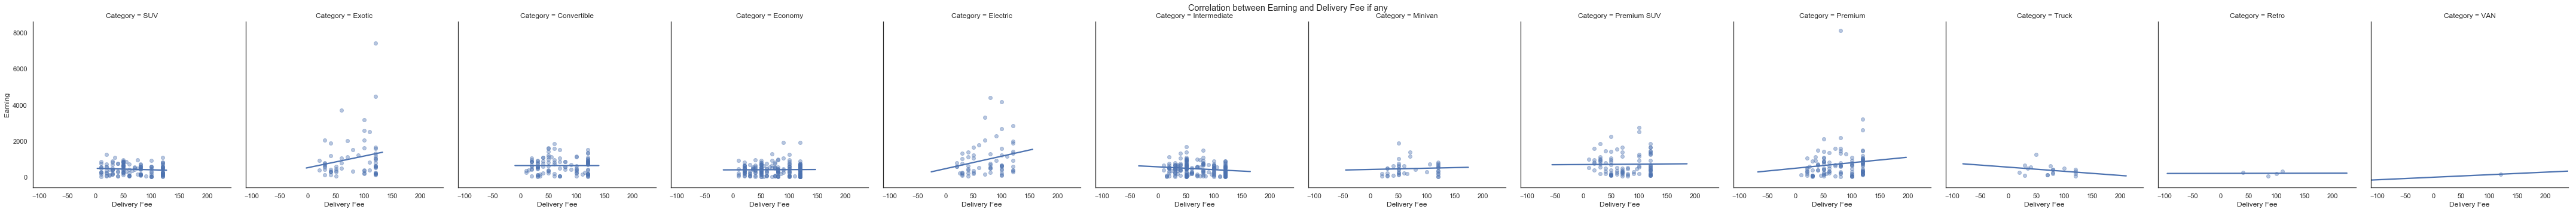

In [144]:
df1 = df[(df['fee']>0)]
# Earning with fee
sns.set(style="white")

g = sns.lmplot(y='Earning', 
               x='fee',
               data=df1, # Data.
               col='Category',
               fit_reg=True,
               ci=False,
               scatter_kws={'alpha':0.4})
g.set_ylabels("Earning")
g.set_xlabels("Delivery Fee")
plt.suptitle('Correlation between Earning and Delivery Fee if any')
plt.subplots_adjust(top=0.9)
plt.show()


In [150]:
df1.groupby('Category')[['fee','Earning']].corr()

fee   Earning
Category                                
Convertible  fee      1.000000 -0.000718
             Earning -0.000718  1.000000
Economy      fee      1.000000  0.013891
             Earning  0.013891  1.000000
Electric     fee      1.000000  0.244518
             Earning  0.244518  1.000000
Exotic       fee      1.000000  0.195358
             Earning  0.195358  1.000000
Intermediate fee      1.000000 -0.171626
             Earning -0.171626  1.000000
Minivan      fee      1.000000  0.063393
             Earning  0.063393  1.000000
Premium      fee      1.000000  0.118525
             Earning  0.118525  1.000000
Premium SUV  fee      1.000000  0.013072
             Earning  0.013072  1.000000
Retro        fee      1.000000  0.017766
             Earning  0.017766  1.000000
SUV          fee      1.000000 -0.103601
             Earning -0.103601  1.000000
Truck        fee      1.000000 -0.275037
             Earning -0.275037  1.000000
VAN          fee           NaN       NaN
             Earning       NaN       NaN